In [1]:
# initial setup
try:
    # settings colab:
    import google.colab
    
    ! mkdir -p ../Data
    # los que usan colab deben modificar el token de esta url:
    ! wget -O ../Data/cereal.csv https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_students_2020/master/M3/CLASE_16_Regresion_Lineal_Multiple/Data/cereal.csv?token=AA4GFHPAEDQWNF4BCOROIRK63AQB2    
    
except ModuleNotFoundError:    
    # settings local:
    %run "../../../common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.23.1 already installed
xlrd=1.2.0 already installed
nltk=3.4.5 already installed
unidecode=1.0.23 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.8.1 already installed
flask=1.0.3 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

### Dataset cereales

En el siguiente dataset se encuentra información sobre diferentes cereales.

Las categorías en las columnas son:
       
   * **name** : Nombre del producto
   
   
   * **mfr** : Nombre del fabricante:
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
   
   
   *  **type**:
      * C = frío  
      * H = caliente 
        
   
   *  **calories**: calorias por porción
   *  **protein**:  gramos de proteinas
   *  **fat**:      gramos de grasa
   *  **sodium**:   miligramos de sodio
   *  **fiber**:    gramos de fibra dietética
   *  **arbo**:     gramos de azúcares complejos
   *  **sugars**:   gramos de azúcares simples
   *  **potass**:   miligramos de K
   *  **vitamins**: vitaminas y minerales - 0, 25, o 100, indicando el % recomendado por la FDA.
   *  **shelf**:    display shelf (1, 2, or 3, counting from the floor)
   *  **weight**:   peso en onzas de una porción
   *  **cups**:     numero de copas en una porción 
   *  **rating**:   clasificación de los cereales (Possibly from Consumer Reports?)
        
A partir de ésta información:
     
  * Caracterizar el tipo de dato de cada columna (_string, int, float_) y,
  * Reconocer el tipo variable (_continua, categórica_).

### Leer el Archivo 'cereal.csv'.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../Data/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


#### Imprimir 5 muestras para reconocimiento de datos,  ¿Coinciden con las caracterizaciones realizadas?

In [5]:
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
35,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00,21.871292
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392
37,Honey-comb,P,C,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33,28.742414
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50,39.241114
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594


#### Tomar una columna categórica a elección y convertir en una variable dummie.

Se puede utilizar la función ```pd.get_dummies()```.


In [6]:
dum = pd.get_dummies(df.mfr, drop_first=True)
dum

,G,K,N,P,Q,R
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
72,1,0,0,0,0,0
73,1,0,0,0,0,0
74,0,0,0,0,0,1
75,1,0,0,0,0,0


##### Tomar la columna de fabricante, transformar a variable dummie y contar cuantos productos son de Kelloggs.

In [9]:
#hecho
import numpy as np
import seaborn as sns

dum['K'].sum()

23

##### Ordenar los fabricantes por cantidad de productos en orden descendente y presentarlo en un gráfico.

<AxesSubplot:>

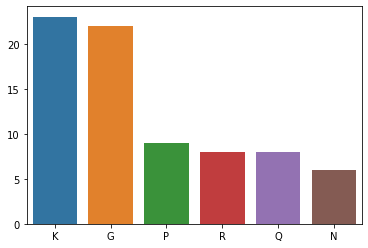

In [13]:
sorteado = dum.sum().sort_values(ascending=False)

sns.barplot(sorteado.index, sorteado.values)

##### La función ```pd.get_dummies()``` permite tomar mas de una columna, por ejemplo, utilizando slicing. 
##### Tomar las columnas 'mfr' y 'type',  y convertirlas en variables dummies simultáneamente, obtener una descripción de ese dataframe.

In [14]:
pd.get_dummies(df.loc[:,'mfr':'type']).describe()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.012987,0.285714,0.298701,0.077922,0.116883,0.103896,0.103896,0.961039,0.038961
std,0.113961,0.454716,0.460690,0.269807,0.323388,0.307127,0.307127,0.194771,0.194771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
